In [14]:
!pip install scikit-learn-intelex

In [15]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [16]:
# math related operations
import numpy as np
import pandas as pd

# machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random

# to open, load, convert array to image
from PIL import Image

# to preprocess the image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Since it is multiclass classification, one hot encoding is needed
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# for augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# MobileNetV3 model
from tensorflow.keras.applications import mobilenet_v3
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
# loading directory
bcc_dir='/kaggle/input/isic-2019-skin-lesion-images-for-classification/BCC/'
mel_dir='/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/'
nv_dir='/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/'

# storing all the images from directories 
bcc_images=os.listdir(bcc_dir)
mel_images=os.listdir(mel_dir)
nv_images=os.listdir(nv_dir)

**Checking sample images**

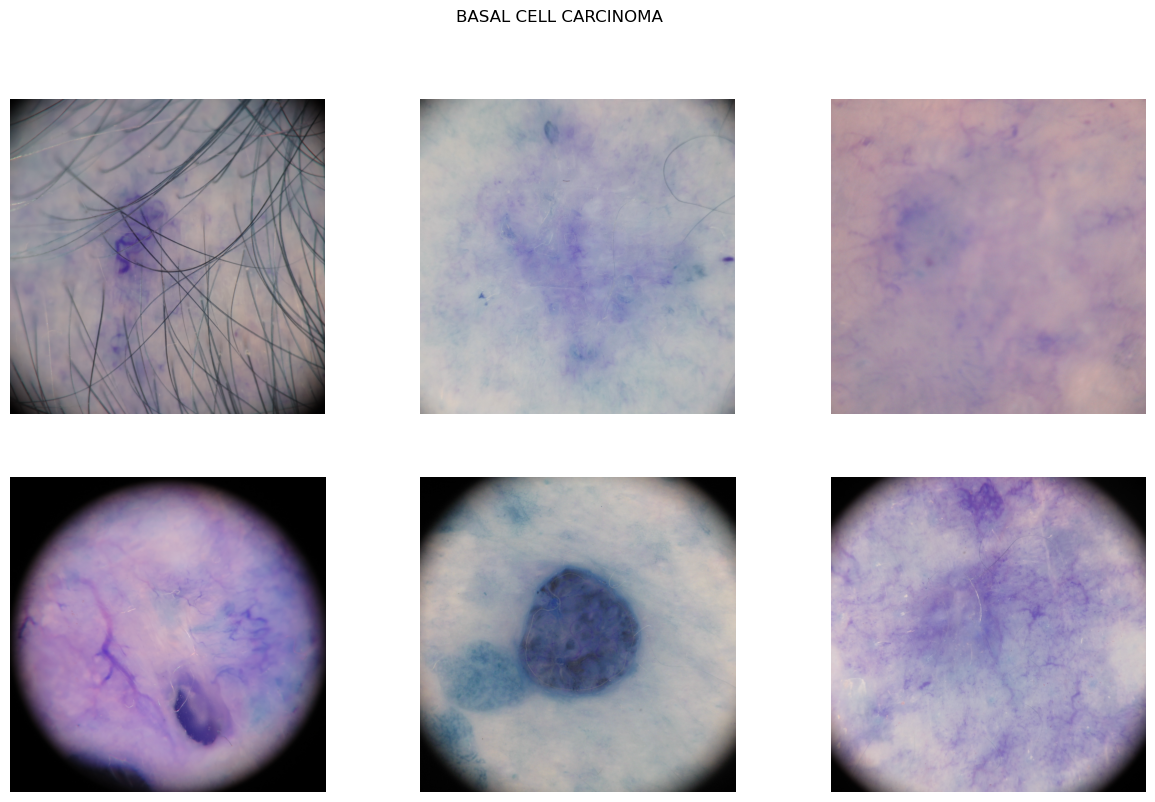

In [18]:
# can change shape, size and color, therefore difficult to  determine or find
sample_parasite=random.sample(bcc_images, 6)
f, ax=plt.subplots(2, 3, figsize=(15, 9)) # 2 rows 3 columns of subplot

for i in range(0, 6):
    im=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/BCC/' + sample_parasite[i])
    ax[i//3, i%3].imshow(im)
    ax[i//3, i%3].axis('off')
f.suptitle('BASAL CELL CARCINOMA') # secondary description or explanation
plt.show()

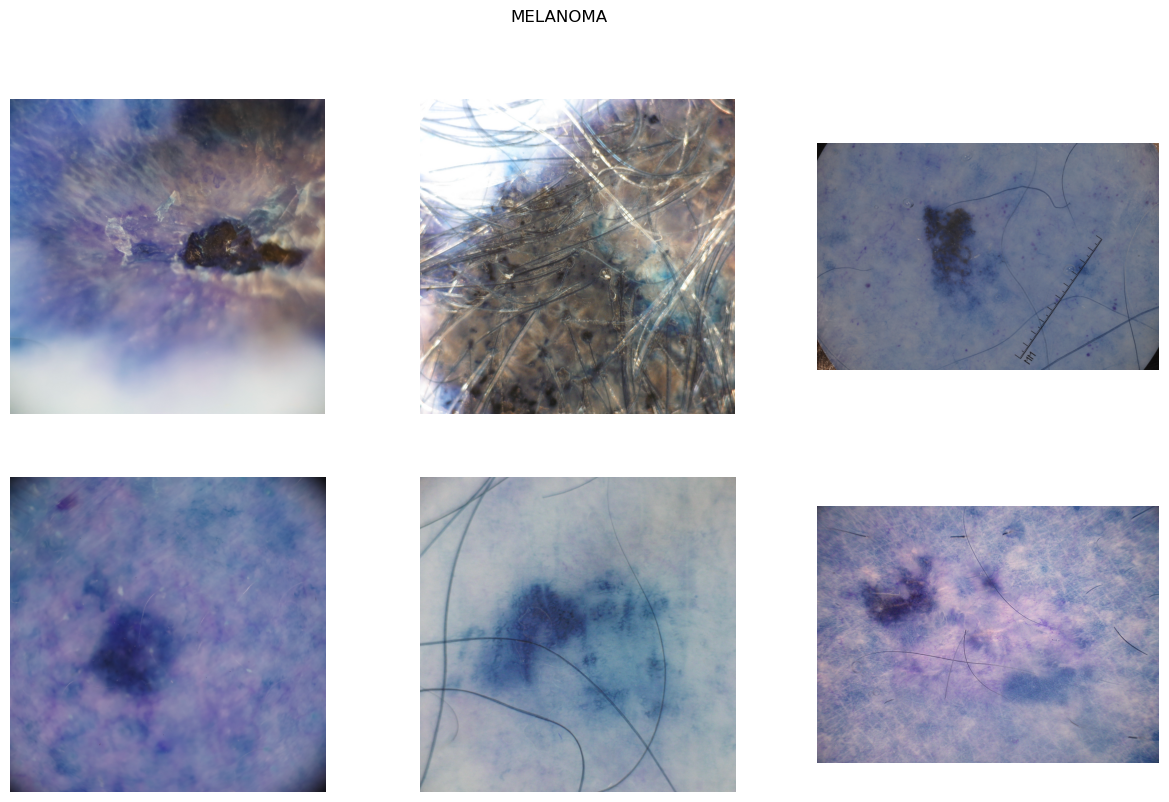

In [19]:
# the most serious type of cancer, as its spread is vast
sample_parasite=random.sample(mel_images, 6)
f, ax=plt.subplots(2, 3, figsize=(15, 9)) # 2 rows 3 columns of subplot

for i in range(0, 6):
    im=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/' + sample_parasite[i])
    ax[i//3, i%3].imshow(im)
    ax[i//3, i%3].axis('off')
f.suptitle('MELANOMA') # secondary description or explanation
plt.show()

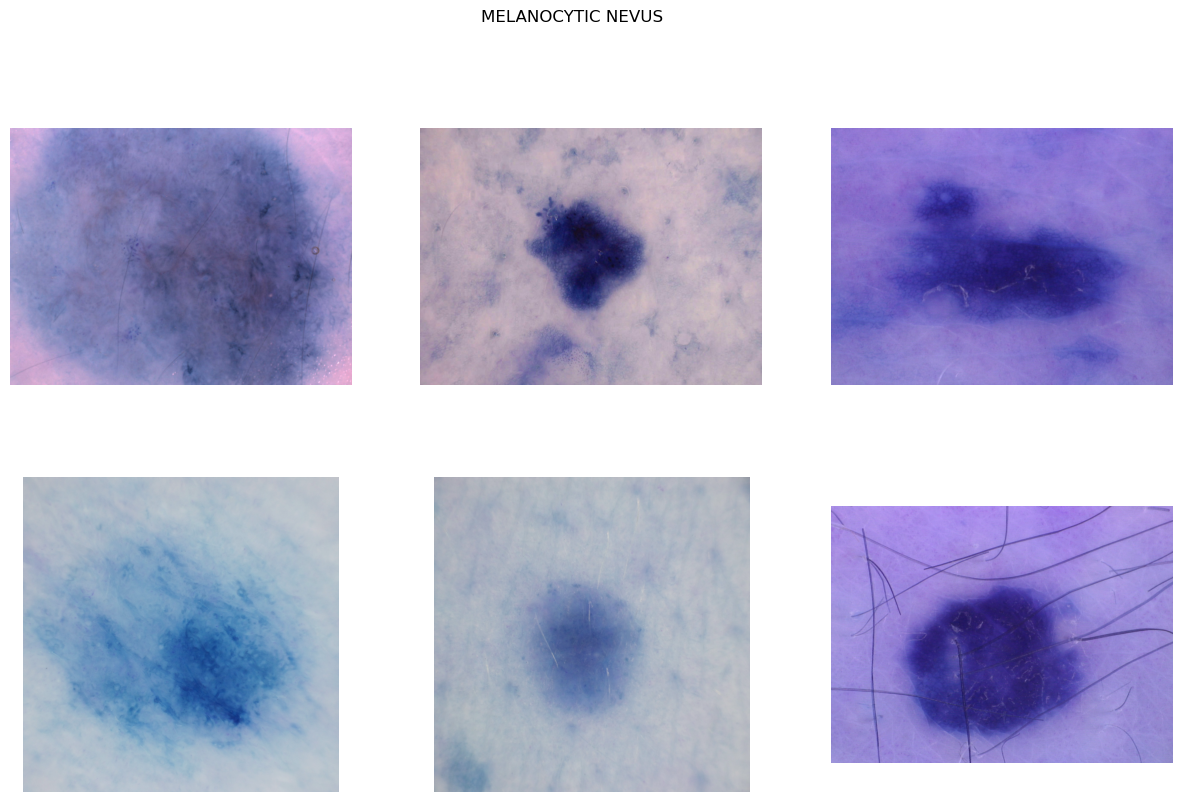

In [20]:
# it is a mould and sometimes it may turn cancerous, usually safer

sample_parasite=random.sample(nv_images, 6)
f, ax=plt.subplots(2, 3, figsize=(15, 9)) # 2 rows 3 columns of subplot

for i in range(0, 6):
    im=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/' + sample_parasite[i])
    ax[i//3, i%3].imshow(im)
    ax[i//3, i%3].axis('off')
f.suptitle('MELANOCYTIC NEVUS') # secondary description or explanation
plt.show()

In [21]:
dataset=[]
label=[]

basal=os.listdir('/kaggle/input/isic-2019-skin-lesion-images-for-classification/BCC/')
melanoma=os.listdir('/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/')
nevus=os.listdir('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/')

In [22]:
for b in basal:
    if(b.split('.')[1] == 'jpg'):
        image=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/BCC/' + b) # read image
        image=Image.fromarray(image, 'RGB') # obtain image from array
        image=image.resize((224, 224))
        dataset.append(np.array(image))
        label.append(0)

In [23]:
for m in melanoma:
    if(m.split('.')[1] == 'jpg'):
        image=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/' + m) # read image
        image=Image.fromarray(image, 'RGB') # obtain image from array
        image=image.resize((224, 224))
        dataset.append(np.array(image))
        label.append(1)

In [24]:
for n in nevus:
    if(n.split('.')[1] == 'jpg'):
        image=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/' + n) # read image
        image=Image.fromarray(image, 'RGB') # obtain image from array
        image=image.resize((224, 224))
        dataset.append(np.array(image))
        label.append(2)

In [25]:
# converting features and labels to array
features=np.array(dataset)
labels=np.array(label)

In [34]:
#saving the data and labels

np.save('/kaggle/working/features', features)
np.save('/kaggle/working/labels', labels)

In [35]:
features=np.load('/kaggle/working/features.npy')
labels=np.load('/kaggle/working/labels.npy')


**Randomizing features and labels**